In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
df = pd.read_csv('balance.txt')

In [3]:
df.columns

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0    400 non-null int64
Income        400 non-null float64
Limit         400 non-null int64
Rating        400 non-null int64
Cards         400 non-null int64
Age           400 non-null int64
Education     400 non-null int64
Gender        400 non-null object
Student       400 non-null object
Married       400 non-null object
Ethnicity     400 non-null object
Balance       400 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [5]:
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [6]:
y = df.Balance

In [10]:
X = df.drop(columns=['Balance'])
X = pd.get_dummies(X)
X = sm.add_constant(X)
X.head()
#X = df.drop(columns=['Gender_Male', 'Student_No', 'Married_No', 'Ethnicity_Asian'])
X = X.drop(columns=['Gender_Female','Student_No','Married_No','Ethnicity_Asian'])

In [13]:
X.head()

,const,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender_ Male,Student_Yes,Married_Yes,Ethnicity_African American,Ethnicity_Caucasian
0,1.0,1,14.891,3606,283,2,34,11,1,0,1,0,1
1,1.0,2,106.025,6645,483,3,82,15,0,1,1,0,0
2,1.0,3,104.593,7075,514,4,71,11,1,0,0,0,0
3,1.0,4,148.924,9504,681,3,36,11,0,0,0,0,0
4,1.0,5,55.882,4897,357,2,68,16,1,0,1,0,1


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Construct the model
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     450.6
Date:                Wed, 18 Jul 2018   Prob (F-statistic):          5.37e-164
Time:                        15:45:12   Log-Likelihood:                -1615.2
No. Observations:                 268   AIC:                             3256.
Df Residuals:                     255   BIC:                             3303.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       -477.4417     46.481    -10.272      0.000    -568.978    -385.906
Unnamed: 0                     0.0195      0.058      0.338      0.736      -0.094       0.133
Income                        -7.5929      0.310    -24.465      0.000      -8.204      -6.982
Limit                          0.2216      0.041      5.454      0.000       0.142       0.302
Rating                         0.6277      0.610      1.029      0.304      -0.573       1.829
Cards                         21.3910      5.356      3.994      0.000      10.844      31.938
Age                           -0.5304      0.385     -1.378      0.169      -1.288       0.227
Education                     -0.5830      2.067     -0.282      0.778      -4.653       3.487
Gender_ Male                  22.7738     12.847      1.773      0.077      -2.525      48.073
Student_Yes                  416.4639     21.706     19.186      0.000     373.718     459.210
Married_Yes                   -1.9884     13.347     -0.149      0.882     -28.273      24.296
Ethnicity_African American   -18.2927     18.403     -0.994      0.321     -54.534      17.949
Ethnicity_Caucasian           -2.1490     16.086     -0.134      0.894     -33.828      29.530
==============================================================================
Omnibus:                       18.586   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.032
Skew:                           0.686   Prob(JB):                     2.71e-05
Kurtosis:                       3.006   Cond. No.                     3.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
y_hat = results.predict(X_test)

209     772.457011
280     558.077166
33     -125.543453
210     201.978650
93      871.205893
84       46.316345
329     829.205310
94       84.201889
266     202.972656
126    1308.297008
9      1229.827946
361     455.075067
56      469.669575
72      647.422914
132     864.347372
42      461.990332
278     418.832371
376     770.118832
231     713.641921
385     853.793356
77      241.653270
15       60.261937
391     731.201459
271     479.833037
0       423.112502
396     532.075195
114     380.526136
225     987.416792
262     504.910115
104     738.164762
          ...     
16      113.630171
66     1301.173561
153     121.898452
7       892.332955
19     1009.223837
137     306.789959
355    1318.254317
349     561.658261
131     -14.929632
387    -166.795460
292     540.885366
386     434.105353
297     318.350879
60      646.897781
79        3.317042
285    -145.044533
305    -121.206578
281    -200.344143
157     984.233434
109     416.450961
17      445.475619
347    1184.

In [18]:
r2_score(y_test, y_hat)

0.9522383003309712

Text(0.5,1,'actual vs. predicted')

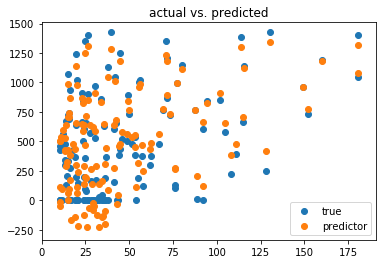

In [19]:
plt.scatter(X_test.Income, y_test, label='true')
plt.scatter(X_test.Income, y_hat, label='predictor')
plt.legend() 
plt.title('actual vs. predicted')

Text(0.5,1,'actual vs. predicted')

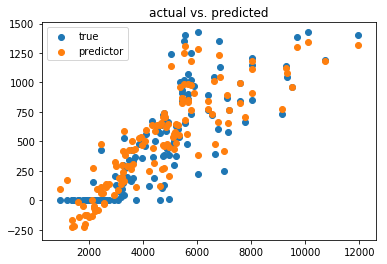

In [20]:
plt.scatter(X_test.Limit, y_test, label='true')
plt.scatter(X_test.Limit, y_hat, label='predictor')
plt.legend() 
plt.title('actual vs. predicted')

Text(0.5,1,'actual vs. predicted')

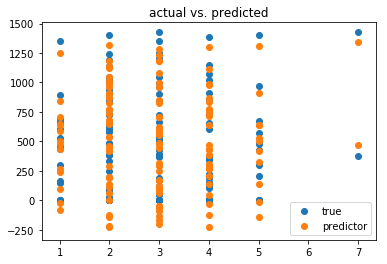

In [21]:
plt.scatter(X_test.Cards, y_test, label='true')
plt.scatter(X_test.Cards, y_hat, label='predictor')
plt.legend() 
plt.title('actual vs. predicted')

Text(0.5,1,'actual vs. predicted')

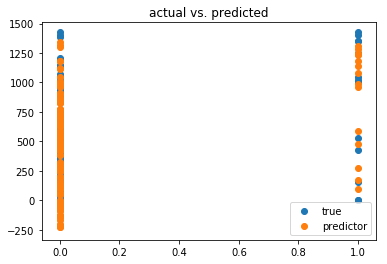

In [22]:
plt.scatter(X_test.Student_Yes, y_test, label='true')
plt.scatter(X_test.Student_Yes, y_hat, label='predictor')
plt.legend() 
plt.title('actual vs. predicted')

Text(0.5,1,'actual vs. predicted')

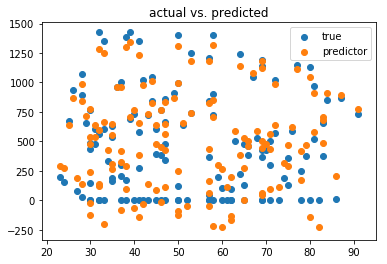

In [25]:
np.linalg.inv(X.T @ X) @ (X.T@y)

array([-4.79762874e+02,  4.10476414e-02, -7.80739871e+00,  1.90521273e-01,
        1.14248766e+00,  1.78363875e+01, -6.29546793e-01, -1.09830902e+00,
        9.54615446e+00,  4.26167154e+02, -8.78055030e+00, -1.68575176e+01,
       -7.56462490e+00])